In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import numpy as np
import pandas as pd
from math import sqrt

In [15]:
filepath = Path.cwd()
print(filepath)

/vol/ml/apartin/projects/DrugResponseViz/notebooks


In [14]:
def barplot_high_low_items_by_mcc(labels, values, N=4, xlabel=None, figsize=(9, 7)):
    """ Plot the highest N and lowest N items. """
    fig, ax = plt.subplots(figsize=figsize)

    pos = np.arange(len(labels))

    rects1 = ax.barh(pos[:N], values[:N],
                     align='center', height=0.7,
                     color='b', edgecolor='k', alpha=0.6,
                     label='Highest Values')

    rects2 = ax.barh(pos[N:], values[N:],
                     align='center', height=0.7,
                     color='r', edgecolor='k', alpha=0.6,
                     label='Lowest Values')

    ylabels = [' '.join(s.split('_')) for s in labels]
    ax.set_yticks( pos )
    ax.set_yticklabels( ylabels )
    ax.set_xlabel(xlabel)
    ax.legend();

    for rect in rects1:
        width = rect.get_width()
        width = np.around(width, decimals=2)
        align = 'left'

        xloc = -40
        yloc = rect.get_y() + rect.get_height() / 2  # Center the text vertically in the bar
        label = ax.annotate(width,
                            xy=(width, yloc),
                            xytext=(xloc, 0),           # The position (x,y) to place the text at. If None, defaults to xy.
                            textcoords='offset points', # The coordinate system that xytext is given in
                            ha=align, va='center',
                            color='k', weight='bold', clip_on=True);

    for rect in rects2:
        width = rect.get_width()
        width = np.around(width, decimals=2)
        align = 'left'

        xloc = -50
        yloc = rect.get_y() + rect.get_height() / 2  # Center the text vertically in the bar
        label = ax.annotate(width,
                            xy=(width, yloc),
                            xytext=(xloc, 0),           # The position (x,y) to place the text at. If None, defaults to xy.
                            textcoords='offset points', # The coordinate system that xytext is given in
                            ha=align, va='center',
                            color='k', weight='bold', clip_on=True);
    return fig, ax

In [6]:
# From Tom's email
data = [['Kidney_Renal_Clear_Cell_Carcinoma', 0.464051],
        ['Lung_NOS', 0.501965],
        ['Glioblastoma_Multiforme', 0.539118],
        ['Brain_NOS', 0.540866],
        ['Colon_Adenocarcinoma', 0.541385],
        ['Ovarian_Serous_Cystadenocarcinoma', 0.548709],
        ['Breast_Invasive_Carcinoma', 0.552628],
        ['Lung_Adenocarcinoma', 0.568565],
        ['Skin_Cutaneous_Melanoma', 0.573315],
        ['Lung_Squamous_Cell_Carcinoma', 0.589954],
        ['Ovary_NOS', 0.594004],
        ['Lung_Non-Small_Cell_Carcinoma', 0.594253],
        ['Prostate_Adenocarcinoma', 0.604948],
        ['Acute_Myeloid_Leukemia', 0.616594],
        ['Brain_Lower_Grade_Glioma', 0.617669],
        ['Lung_Small_Cell_Carcinoma', 0.623129],
        ['Myeloma', 0.654870],
        ['Sarcoma', 0.655878],
        ['Chronic_Myeloid_Leukemia', 0.673430],
        ['Lymphoid_Leukemia', 0.689207],
        ['Acute_Lymphoblastic_Leukemia', 0.715012]]

In [17]:
mcc_df = pd.DataFrame(data, columns=['CTYPE', 'mcc']).sort_values('mcc', ascending=False).reset_index(drop=True)
display(mcc_df)

,CTYPE,mcc
0,Acute_Lymphoblastic_Leukemia,0.715012
1,Lymphoid_Leukemia,0.689207
2,Chronic_Myeloid_Leukemia,0.673430
3,Sarcoma,0.655878
4,Myeloma,0.654870
5,Lung_Small_Cell_Carcinoma,0.623129
6,Brain_Lower_Grade_Glioma,0.617669
7,Acute_Myeloid_Leukemia,0.616594
8,Prostate_Adenocarcinoma,0.604948
9,Lung_Non-Small_Cell_Carcinoma,0.594253


In [24]:
ap_types = set([
    'Acute_Myeloid_Leukemia',
    'Breast_Invasive_Carcinoma',
    'Colon_Adenocarcinoma','Esophageal_Carcinoma',
    'Glioblastoma_Multiforme',
    'Head_and_Neck_Squamous_Cell_Carcinoma',
    'Kidney_Renal_Clear_Cell_Carcinoma',
    'Liver_Hepatocellular_Carcinoma',
    'Lung_Adenocarcinoma',
    'Lung_Non-Small_Cell_Carcinoma',
    'Lung_Small_Cell_Carcinoma',
    'Lung_Squamous_Cell_Carcinoma',
    'Lymphoid_Leukemia',
    'Lymphoid_Neoplasm_Diffuse_Large_B-cell_Lymphoma',
    'Ovarian_Serous_Cystadenocarcinoma',
    'Ovary_NOS',
    'Pancreatic_Adenocarcinoma',
    'Sarcoma',
    'Skin_Cutaneous_Melanoma',
    'Stomach_Adenocarcinoma',
    'Uterine_Corpus_Endometrial_Carcinoma'])

,CTYPE,mcc
0,Acute_Lymphoblastic_Leukemia,0.715012
1,Lymphoid_Leukemia,0.689207


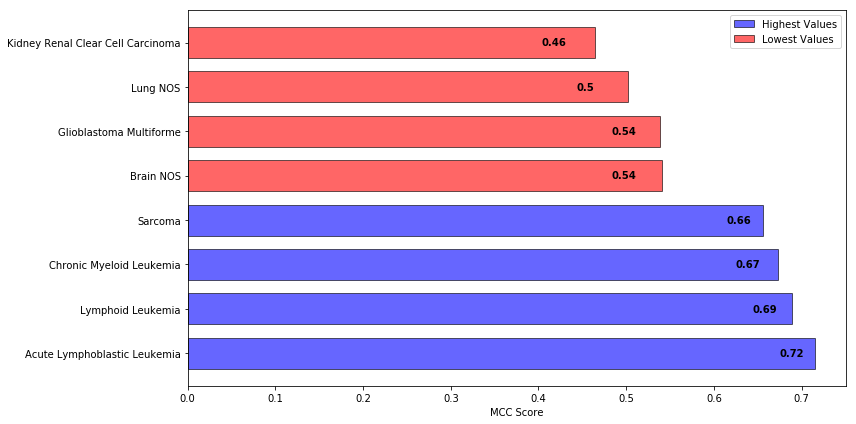

In [18]:
# Get the N most responsive cells
N = 4
col='mcc'
top_items = mcc_df.sort_values(col, ascending=True)[:N]   # Top items
bot_items = mcc_df.sort_values(col, ascending=True)[-N:]  # Bottom items
data_to_plot = pd.concat([top_items, bot_items], axis=0).sort_values(col, ascending=False).reset_index(drop=True)
display( data_to_plot[:2] )

# CTYPE
barplot_high_low_items_by_mcc(labels=data_to_plot.CTYPE.values,
                              values=data_to_plot[col].values,
                              xlabel=f'{col.upper()} Score', N=4, figsize=(12, 6));
plt.tight_layout()
plt.savefig(f'ctype_{col}_hist_tom.png', dpi=150)

In [42]:
# Check cancer type datasets
ct1 = pd.read_csv('/vol/ml/apartin/projects/topN_generator/data/combined_cancer_types', names=['CELL', 'CTYPE'], sep='\t')
ct2 = pd.read_csv('/vol/ml/apartin/projects/DrugResponseViz/data/combined_cancer_types', names=['CELL', 'CTYPE'], sep='\t')
ct3 = pd.read_csv('/vol/ml/brettin/hackathon-2020-01/combined_cancer_types', names=['CELL', 'CTYPE'], sep='\t')

In [56]:
ap_types = set(ct1.CTYPE.unique())
tb_types = set(ct3.CTYPE.unique())
print(len(ap_types))
print(len(tb_types))

69
67


In [54]:
print(ap_types.difference(tb_types))
print(tb_types.difference(ap_types))

{'Sarcoma_NOS', 'Unknown_NOS'}
set()
